In [1]:
import h5py 
import numpy as np
import pandas as pd
from SiFoN import chrom_viz as cviz
%matplotlib inline

### Case study for the `chrom_viz` module

First, we load in Sei data. This should include the output `row_labels.txt` file and the `diffs.h5` files. To get Sei results, either follow the directions on the GitHub (https://github.com/FunctionLab/sei-framework) or on HumanBase (https://hb.flatironinstitute.org/deepsea/). In this case study, we analyze the regulatory region of the PTEN gene.

In [2]:
row_labels = pd.read_csv("test_input_data/chr10_89580225_89633389_row_labels.txt", header=0, sep="\t")
row_labels.head(1)

,chrom,pos,name,ref,alt,strand,ref_match,contains_unk
0,chr10,89580225,.,G,A,+,True,False


For any particular genomic loci (e.g. chr10:89623103), Sei outputs three scores corresponding to each potential alteration at that position (in this case: G>A, G>C, G>T). For this module, we want to focus on the alteration that has the highest predicted impact on regulatory function. The `preprocess_diff` function selects the alteration that has the highest average absolute score across all chromatin classes. The `diff` array is then reduced to include only the highest SNP per position. The `row_labels` dataframe is adjusted accordingly. 

In [3]:
diff_h5 = h5py.File("test_input_data/chr10_89580225_89633389_diffs.h5", 'r')
diff = np.array(diff_h5.get("data"))
diff_h5.close()
diff, row_labels = cviz.preprocess_diff(diff, row_labels)
print(diff.shape)

(53164, 21907)


Select a SNP of interest to study in further detail.

Here, we select a SNP that had particularly high CTCF scores. This function outputs an HTML plot, which is available in `test_output_plots`. Each point (SNP) has hover over data including the chromatin profile name and tissue of original; profile rank; and chromatin diff score. This hover over data provides an overview of what chromatin profiles are being influenced by this SNP. Nonzero scores are the most interesting and therefore they are colored red to signify positive enrichment of a score and blue to signifiy negative enrichment.

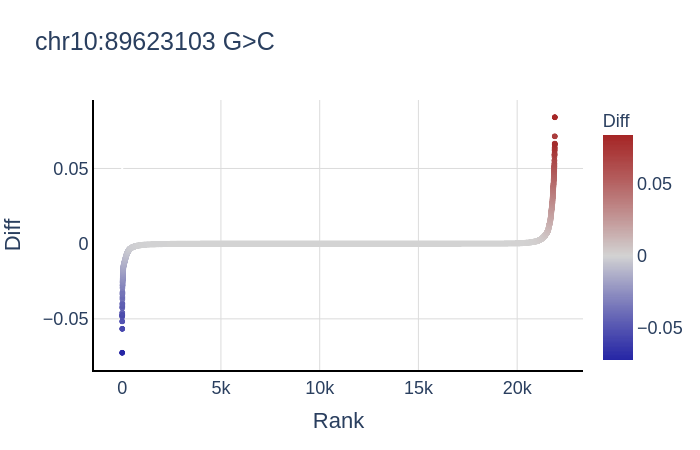

In [5]:
cviz.rank_scatter_plot(diff, row_labels, loc, loc_index, 
                       "test_output_plots/chrom_viz_rank_scatter.html", fontsize=18, static=True)

Instead of looking at just one SNP, we might want to compare the top X chromatin profile for adjacent SNPs to see if there is any agreement in profiles. Here, we select a group of ten adjacent SNPs that had high CTCF scores. The scores seems to have high DNAse scores for epithelial tissue.

In [7]:
loc_index, loc, figname = 104, 89623103, "test_output_plots/chrom_viz_heatmap.pdf"

/home/bmacedo/IW/SiFoN/src/SiFoN/chrom_viz.py:142: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



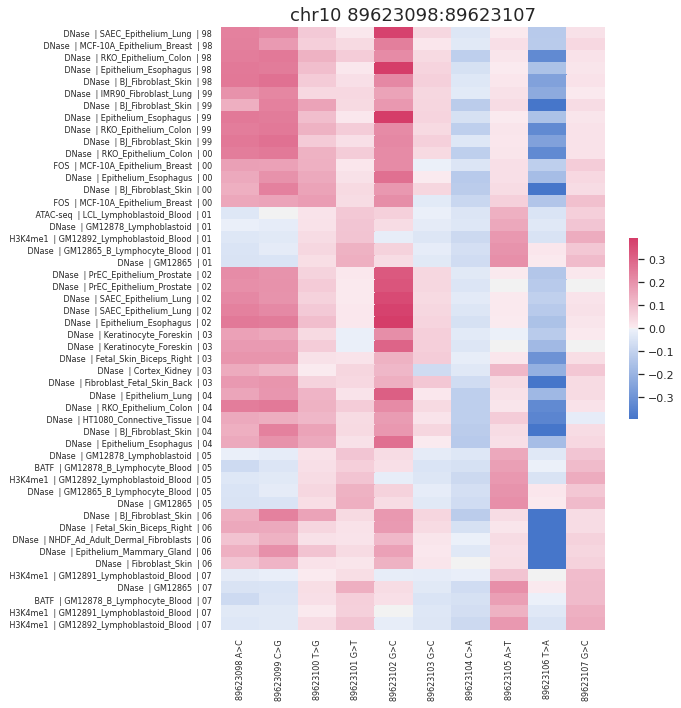

In [9]:
cviz.chromatin_profile_heatmap(diff, row_labels, loc, loc_index, figname, top_X=5, pos_window=5, fontsize=8)